# ICA

Today,we will learn about another dimensionality reduction method ICA. ICA is a linear dimensionality reduction method, which  transforms dataset into set of independent components. Blind source separation and cocktail-party problem are another name for it. 

So, what is ICA?

ICA stands for Independent component analysis. It assumes that each sample of the data is a mixture of independent signals and it's aim is to find these components.
Now, at the heart of the ICA is a term called 'Independence'. We should try to understand it first. What does independence between two variables mean? How it is different from 'correlation'? What are means to measure it?



When can we safely say that two variables are independent?

Suppose $x$,$y$ are two random variables with their pdf's $p(x)$, $p(y)$ respectively. If we recieve some information about x and that doesn't change whatever knowledge we have about y, then we can safely say that x,y are independent variables. You will say that's sounds like absence of correlation. Yes, you are right about that but correlation is not the only way to measure dependence between variables. In fact, what correlation captures is the linear dependence between the variables. If two variables are independent then both linear dependence and non-linear dependence will be zero. Absence of linear dependence does not imply indepence since their might be non linear relationship.

Let's take small artifical example to understand this.


We have two variables $x$, $y$ such that  
$\hspace{2em}p(x)$ = 1/11 for x $\in $(-5,-4,-3,-2,-1,0,1,2,3,4,5) &  
$\hspace{2em}y = x^2 $ which gives us $y \in (25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25)$.  
Now calculate the correlation between these two variables

In [ ]:
import numpy as np

x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
y = np.array([25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25])

np.correlate(x, y)

Since, x, y have non linear relationship correlation fails to capture it. 
Thus, independence between two variables implies zero correlation, whereas it is not true in reverse.

Let's come back to our real topic ICA. As earlier said ICA tries to find out the independent sources from which data is made of. We will start with a classic example used to explain the ICA.
Suppose you are listening to the conversations of two groups of people in a party. You are receiving audio from two sensors placed in the room at different places. Now, both the sensors will receive two audio inputs  one from each group. You will get two output but both of them will be mixture of source audios mixed according to the distance from groups. Now, you want to decipher the original audio from these two mixed inputs. We can use ICA to achieve our objective. This is generally refered to as cocktail party problem.


Suppose we have to two source of audio signals $x_1$ and $x_2$
where $x_1 = f(t)$
and $x_2 = g(t)$.  
Now both mics will receive $x_1$, $x_2$ and they will mix these signals according to the following rules  
$\hspace{7em}X_{sensor1} = a_1 \times x_1 + b_1 \times x_2$  
$\hspace{7em}X_{sensor2} = a_2 \times x_1 + b_2 \times x_2$  
In matrix form  
$\hspace{7em}\begin{bmatrix} X_{sensor1} \\ X_{sensor2}\end{bmatrix} = \begin{bmatrix}a_1 & b_1 \\ a_2 & b_2\end{bmatrix}  \times \begin{bmatrix} x_1 \\ x_2\end{bmatrix}$

$\hspace{7em}X_{new} = A \times S$
where  
$\hspace{7em}A$ is mixing matrix $\begin{bmatrix}a_1 &b_1 \\ a_2 & b_2 \end{bmatrix}$  
$\hspace{7em}S$ is vector of source signals  
$\hspace{7em}X_{new}$ is output vector you receive  

Let's do this exercise with two random sample dataset one gaussian and one uniform

In [2]:
# let's create our signals
np.random.seed(100)
U1 = np.random.uniform(-1, 1, 1000)
U2 = np.random.uniform(-1, 1, 1000)

G1 = np.random.randn(1000)
G2 = np.random.randn(1000)



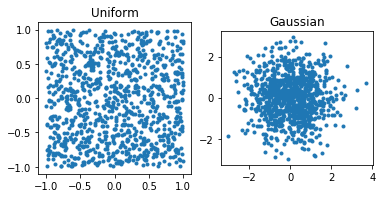

In [3]:
%matplotlib inline
# let's plot our signals

from matplotlib import pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(121, aspect = "equal")
ax1.scatter(U1, U2, marker = ".")
ax1.set_title("Uniform")


ax2 = fig.add_subplot(122, aspect = "equal")
ax2.scatter(G1, G2, marker = ".")
ax2.set_title("Gaussian")


plt.show()

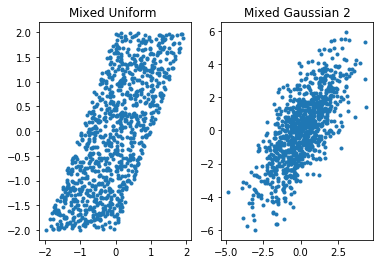

In [4]:
# now comes the mixing part. we can choose a random matrix for the mixing

A = np.array([[1, 0], [1, 2]])

U_source = np.array([U1,U2])
U_mix = U_source.T.dot(A)

G_source = np.array([G1, G2])
G_mix = G_source.T.dot(A)

# plot of our dataset

fig  = plt.figure()

ax1 = fig.add_subplot(121)
ax1.set_title("Mixed Uniform ")
ax1.scatter(U_mix[:, 0], U_mix[:,1], marker = ".")

ax2 = fig.add_subplot(122)
ax2.set_title("Mixed Gaussian ")
ax2.scatter(G_mix[:, 0], G_mix[:, 1], marker = ".")


plt.show()

In real world we don't have knowledge about A(mixing matrix) and S(source vector). We only know the signal recieved at the output. We need to find source vectors of the dataset and mixing matrix. 
Suppose somehow we know the mixing matrix then it makes things a lot easier for us. We need to find the inverse of the matrix A, take its dot product with the dataset and we are done.

$W = A^{-1}$  
$S = W \times X_{new}$

ICA uses this method to find the source signals.


Let's discuss and implement the ICA algorithm step by step.
ICA algorithm makes two main assumptions  
1. All source signals are independent from each other.  
2. All source signals have non gaussian distribution.   
It uses these assumption to find the inverse of mixing matrix.

We have a dataset $X$ with $n$ = number of samples and $m$ = number of dimensions.

First we need to standardize our dataset.
$X_{std} = (X - mean(X, columnwise )) / std(X)$

Then , we can remove the linear dependence using PCA algorithm

$X_{pca} = PCA(X)$

$X_{pca}$ is the output of the transformation of the PCA algorithm and free from linear dependence.
For removing higher order dependence we will take help of information theory.



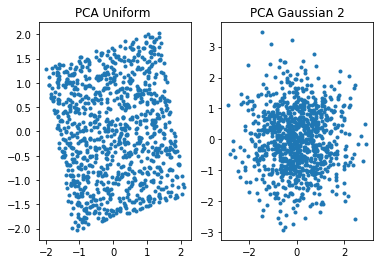

In [5]:
# PCA and whitening the dataset
from sklearn.decomposition import PCA 
U_pca = PCA(whiten=True).fit_transform(U_mix)
G_pca = PCA(whiten=True).fit_transform(G_mix)

# let's plot the datasets
fig  = plt.figure()

ax1 = fig.add_subplot(121)
ax1.set_title("PCA Uniform ")
ax1.scatter(U_pca[:, 0], U_pca[:,1], marker = ".")

ax2 = fig.add_subplot(122)
ax2.set_title("PCA Gaussian ")
ax2.scatter(G_pca[:, 0], G_pca[:, 1], marker = ".")


Let's talk a bit about the second assumption ICA makes "**non gaussianiaty of source signals**".  

This assumption comes from centra limit theorem. According to central limit theorem sum of independent random variables is more gaussian than the independent variables. So, to infer the source variables we have to move away from gaussianity. In case of gaussian distribution uncorrelated gaussian variables are also independent, it is a unique property associated with gaussian distribution.
See the plots above, U_pca can be multiplied by a suitable rotation matrix to get the original signals. Same cannot be said about the G_pca since it is rotationally symmetric. No matter what the rotation matrix is it will look same. Thus, in case of gaussian variables after PCA, we can't obtain more information.

#### Removing non-linear dependence
We can minimize the non-linear dependence by reducing mutual information among the variables. From information theory mutual information can be defined as

$MI$ = sum of Entropies of marginal distribution functions - Entrophy of joint distribution function

Now, entrophy is measure of the average information contained in a data. For a variable $x$ with $pdf$  $p(x)$  , it is given by  
$ H(x) = - \Sigma_{i}\,(\,p\,(x_i) \times  log_2(\,p(\,x_i\,)))$


So, for two variables $x$, $y$ we have to minimize following function

$z = p(x, y) $ joint probability distribution of $x$ & $y$  
$MI = H(x)+ H(y) - H((z))$  

Suppose the V is the transformation matrix which we need to multiply with X_new to remove the higher order dependence. Then, we can define  
$MI =   \Sigma_{i}\,(\,H\,(\,V_i\,\times X_{pca_{i}}\,\,)\,) - H\,(\,V\times X_{pca}\,)$  
$MI =  \Sigma_{i}\,(\,H\,(\,V_i\,\times X_{pca_{i}}\,\,)\,) - H(X_{pca}) +log_2(det(V))$  
Since $V$ is rotation matrix its determinant is 1 , hence $log_2(det(V)) = 0$. Now, $H(X_{pca})$ does not depend upon $V$ so we can drop it.

we get  
$MI =  \Sigma_{i}\,(\,H\,(\,V_i\,\times X_{pca_{i}}\,\,)\,)$  
Thus,  
$V = \arg\min_{V} \; \Sigma_{i}\,(\,H\,(\,V_i\,\times X_{pca_{i}}\,\,)\,)$  

There is another method to find the matrix V '$negentropy$' which is given by  

$J(y) = H(y_g) - H(y)$  
Where $H$ is entropy  
      $y$ is our X_{pca}
      and $y_{gauss}$ is guassian random vector with same covariance as $y$
      
Among all the distributions guassian distribution has highest entropy. Negentropy is zero if $y$ is gaussian and non-zero if $y$ is not gaussian. We can maximize the negentropy function to get the $V$ matrix.  
Also, $MI = constant  - J(y)$  

Now, both the methods require calculation of entropy. Entropy calculation is hard because we need to know the pdf of the variables which is not known.  

We can approximate negentropy with some suitable functions. Few useful examples are  
$g_1(y) =  tanh(ay\,)$  
$g_2(y) = -exp(\,-y^2\,/\,2\,)$  
$g_3(y) = -yexp(\,-y^2\,/\,2\,)$  







#### Pseudocode ICA

After taking derivative of the negentropy and using langrange multipliers to optimize the function we get a nice formula for updating current estimate of W(a row vector of V)  
 $W$ = $\mathbb E${ $\,$ XG($W^T$ X) $\,$} - $\mathbb E${$\;g(W^T X\,)\,$}$W$  
 $W = W/||W||$
 
 where $G$ is approximating function and $g$ is derivative of $G$

If you wish to derive the formula yourself you can check [book](https://www.cs.helsinki.fi/u/ahyvarin/papers/bookfinal_ICA.pdf)  
Psuedocode for finding V matrix

1. for $i$ in (1,number of sources):
2.    $\hspace{1em}W_i$ = random vector (initialization of  $W_i$)
3.    $\hspace{1em}$while $W$ changes:
4.    $\hspace{2em}W_i$ = $\mathbb E${ $\,$ XG($W_i^T$ X) $\,$} - $\mathbb E${$\;g(W_i^T X\,)\,$}$W_i$ $\hspace{2em}$(update of w)
5.    $\hspace{2em}W_i$ = $W_i$ - $\Sigma_{j=0}^{i-1}W_iW_jW_j$   $\hspace{6em}$(orthogonalization of $W_i$ w.r.t other vectors of $V$ using gram-schmidt process)
6.    $\hspace{2em}W = W/||W||$
 
In the above alogirthm we are using gram-schmidt process for obtaining a $W_i$ such that it is orthogonal to all other $W$ vectors obtained earlier.  

Let's implement the ICA algorithm.  



In [4]:
# approximating function is G(x) = xexp(-x**2/2)
def g(x):
    return x * np.exp(-(x**2)/2)

def gprime(x):
    return (1 - x**2) * np.exp(-(x**2)/2)


# update of Wi
def update_vector(W, X):
    
    Y1 = W.dot(X)
    f1 =  (X * g(Y1)).mean(axis = 1)
    f2 = gprime(Y1).mean() * W
    W = f1 - f2
    return(W)

# orthonormalize the Wi
def orthonormalize(W, w, k):
    
    C= np.zeros_like(w)
    for j in range(k):
        
        C = C + np.dot(w, W[j].T) * W[j]
    w = w - C
    
    return(w /np.sqrt((w * w).sum()))

# calculation of unmixing matrix
# X.shape = number_of_dimensions, number of samples
def calculate_V(X, W_init):
    
    n_f, n_sample = X.shape
    W = np.zeros((n_f, n_f))
    
    for i in range(n_f):
        
        w = W_init[i, :].copy()
        w /= np.sqrt((w**2).sum())
        w_old = np.zeros((1, n_f))
        j=0
        max_iter = 1000
        while (np.abs(np.abs((w*w_old).sum())-1) > 1e-3 and (j < max_iter-1)):
            w_old = w
            w = update_vector(w, X)
            
            w = orthonormalize(W, w, i)
            
            j +=1
        
        W[i, :] = w
        
        
    return(W)

We have implemented the ica algorithm, but we don't know how many or which components to select.
ICA does not tell us anything about the order of the components or how many of them are relevant. Thus finding right number of components is hard.  
We can restrict the number of components using PCA, then find the same number of independent components.

In [9]:

# selection of number of components
# W = unmixing matrix
# S = source signal matrix
def ICA(X, n_comp=None):
    
    X = (X - X.mean(axis = 0))/(X.std(axis=0))
    pca = PCA(whiten=True)
    X_pca = pca.fit_transform(X)
    explained_var = pca.explained_variance_
    if not n_comp:
        n_comp = np.argmax(np.cumsum(explained_var)/explained_var.sum() > 0.99)+1
    K = pca.components_[0:n_comp]/pca.singular_values_
    X_pca = X_pca[:,0:n_comp]
    W_init = np.random.rand(n_comp, n_comp)
    V = calculate_V(X_pca.T, W_init)
    S = V.dot(X_pca.T)
    
    W = V.dot(K)
    
    return(W, S,V,K)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

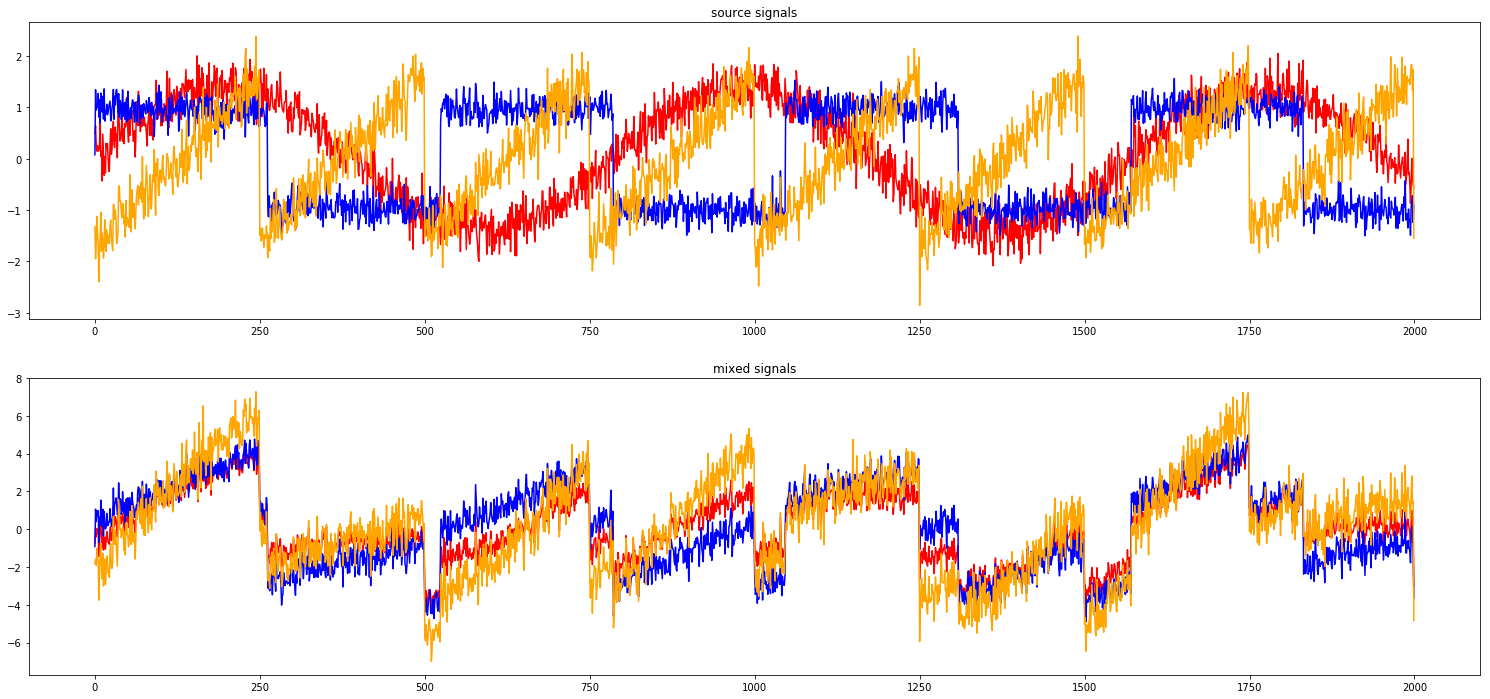

In [2]:
# plot the simulated dataset
plt.figure(figsize =(26,12) )
colors = ['red', 'blue', 'orange']

plt.subplot(2,1,1)
plt.title('source signals')
for color, series in zip(colors, S.T):
    plt.plot(series, color)
plt.subplot(2,1,2)
plt.title('mixed signals')
for color, series in zip(colors, X.T):
    plt.plot(series, color)

In [10]:
W_, S_,V_ , K_= ICA(X, 3)

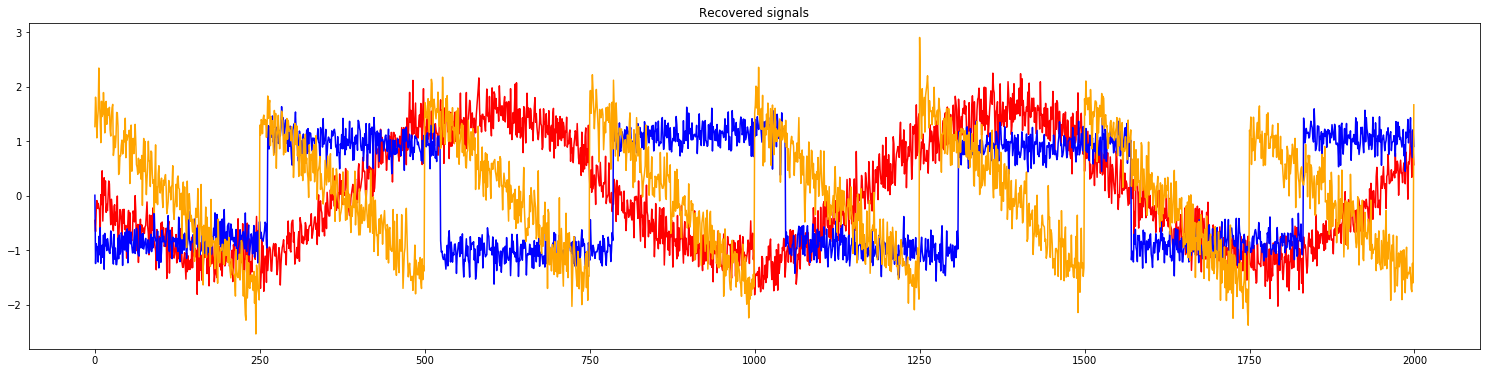

In [19]:
plt.figure(figsize =(26,6) )
plt.title('Recovered signals')
for color, series in zip(colors, S_):
    
    plt.plot(series, color)


#### Implementation of ICA on spark

Now, we have to modify the code above for the pyspark.
First we will write code for PCA and whitening the dataset. 

In [104]:
from pyspark.mllib.linalg.distributed import IndexedRowMatrix, IndexedRow, BlockMatrix
from pyspark.mllib.feature import StandardScaler
from pyspark.mllib.linalg import Vectors, DenseMatrix, Matrix
from sklearn import datasets

iris = datasets.load_iris()

iris_data = iris.data
# read the dataset 
# create the standardizer model for standardizing the dataset

iris_rdd = sc.parallelize(iris_data).map(lambda x:Vectors.dense(x) )
scaler = StandardScaler(withMean = True, withStd = False).fit(iris_rdd)

iris_sc = scaler.transform(iris_rdd)


#create the IndexedRowMatrix from rdd
iris_rm = IndexedRowMatrix(iris_sc.zipWithIndex().map(lambda x: (x[1], x[0])))

# compute the svd factorization of the matrix. First the number of columns and second a boolean stating whether 
# to compute U or not. 
svd_o = iris_rm.computeSVD(iris_rm.numCols(), True)

# svd_o.V is of shape n X k not k x n(as in sklearn)

P_comps = svd_o.V.toArray().copy()
num_rows = iris_rm.numRows()
# U is whitened and projected onto principal components subspace.

S = svd_o.s.toArray()
eig_vals = S**2
n_comp  = np.argmax(np.cumsum(eig_vals)/eig_vals.sum() > 0.95)+1
U = svd_o.U.rows.map(lambda x:(x.index, (np.sqrt(num_rows-1)*x.vector).tolist()[0:n_comp]))
# K is our transformation matrix to obtain projection on PC's subspace
K1 = (P_comps/S).T[:n_comp]

# calculation of number of principal components to retain.


Now we need to write the code to calculate the independent components.
Few changes are required in our code to leverage the power of distributed computing framework. Instead of calculating each column of V sequentially, we need to calculate the whole V matrix simultaneously.
Symmetric decorrelation is used to orthonormalize columns of a matrix in parallel. For a $m \times n$ matrix $W$ symmetric decorrelation is given by  
$\hspace{4em}W = (WW^T)^{-1/2} W$  
$(WW^T)^{-1/2}$ is given by by eigenvalue decomposition   
$\hspace{4em}(WW^T)^{-1/2} = E\;\times \;diag(d_1^{-1/2}, d_2^{-1/2},....,d_m^{-1/2})\; \times \;E^T$

In [ ]:
import pyspark.sql.functions as f
import pyspark.sql.types as t

#rdd = sc.parallelize(iris.data.tolist()).zipWithIndex()
df = spark.createDataFrame(U).toDF("id", "features")

def calc(df):
    
    def foo(x,y):
    
        y_arr = np.array(y)
        gy = g(y_arr)
        gp = gprime(y_arr)
        x_arr = np.array(x)
        res = np.outer(gy,x_arr)
        return([res.flatten().tolist(), gp.tolist()])
    
    udf_foo = f.udf(foo, t.ArrayType(t.ArrayType(t.DoubleType())))


    
    df2 = df.withColumn("vals", udf_foo("features","Y"))
    
    df2 = df2.select("id", f.col("vals").getItem(0).alias("gy"), f.col("vals").getItem(1).alias("gy_"))
    GY_ = np.array(df2.agg(f.array([f.sum(f.col("gy")[i]) 
                                    for i in range(n_comp**2)])).collect()[0][0]).reshape(n_comp,n_comp)/num_rows

    GY_AVG_V  = np.array(df2.agg(f.array([f.avg(f.col("gy_")[i]) 
                                      for i in range(n_comp)])).collect()[0][0]).reshape(n_comp,1)*V
    
    return(GY_, GY_AVG_V)


np.random.seed(101)
# Initialization
V = np.random.rand(n_comp, n_comp)


# Approximating function g(y) = x*exp(-x**2/2) and its derivative
def g(X):
    x = np.array(X)
    return(x * np.exp(-x**2/2.0))

def gprime(Y):
    y = np.array(Y) 
    return((1-y**2)*np.exp(-y**2/2.0))

# symmetric decorelation function 
def sym_decorrelation(V):
    
    U,D,VT = np.linalg.svd(V)
    Y = np.dot(np.dot(U,np.diag(1.0/D)),U.T)
    return np.dot(Y,V)

def denseMatrix(v):
    # need to transpose v before flatten because densematrix will create matrix columnwise instead of rowwise
    row,col = v.shape
    return(DenseMatrix(row, col, v.flatten()))

numIters = 10

V = sym_decorrelation(v_init)

tol =1e-3

V_bc = sc.broadcast(V)


for i in range(numIters):
    
    # Y = V*X
    udf_mult = f.udf(lambda x: V_bc.value.dot(np.array(x)).tolist(), t.ArrayType(t.DoubleType()))
    df = df.withColumn("Y", udf_mult("features"))
    
    gy_x_mean, g_y_mean_V = calc(df)
    
    V_new = gy_x_mean - g_y_mean_V
    
    V_new = sym_decorrelation( V_new )
    
    #condition for convergence
    lim = max(abs(abs(np.diag(V_new.dot(V.T)))-1))
    
    V = V_new
    V_bc = sc.broadcast(V)
    print(V)
    print("i= ",i," lim = ",lim)
    
    if lim < tol:
        break
    elif i== numIters:
        print("Lower the tolerance or increase the number of iterations")

#calculate the unmixing matrix for dataset         
W = V.dot(K)

#now multiply U with V to get source signals
S = df.withColumn("Y", udf_mult("features"))



Visualization of **MNIST** dataset using above ICA code

### Advantages and Drawbacks
ICA is an important tool in neuroimaging. It is used for spatial and temporal separation of EEG and fMRI signals. ICA doesn't have a closed form solution. Finding about the number of independent compoenents and their order is hard.